In [ ]:
from tensorflow.python.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(y_train[0])

1


In [ ]:
class_names = ['Negative', 'Positive']

In [ ]:
word_index = imdb.get_word_index()
print(word_index['hello'])

1646592/1641221 [==============================] - 0s 0us/step
4822


In [ ]:
reverse_word_index = dict((value, key) for key, value in word_index.items())
def decode(review):
  text = ''
  for i in review:
    text+= reverse_word_index[i]
    text += ' '
  return text


In [ ]:
  decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [ ]:
def show():
  print('length of 1st example', len(x_train[0]))
  print('length of 2nd example', len(x_train[1]))
  print('length of 1st test example', len(x_test[0]))
  print('length of 2nd test example', len(x_test[1]))

show()


length of 1st example 218
length of 2nd example 189
length of 1st test example 68
length of 2nd test example 260


In [ ]:
word_index['the']

1

In [ ]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)


In [ ]:
show()

length of 1st example 256
length of 2nd example 256
length of 1st test example 256
length of 2nd test example 256


In [ ]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
                    Embedding(10000,16),
                    GlobalAveragePooling1D(),
                    Dense(16, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')

])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_logging = LambdaCallback(on_epoch_end = lambda e, l: print(e, end='.'))

E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_logging],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

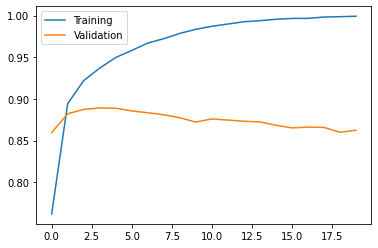

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()


In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy', acc*100)

782/782 [==============================] - 1s 1ms/step - loss: 0.9873 - accuracy: 0.8410
Test set accuracy 84.10000205039978


In [ ]:
import numpy as np

prediction = model.predict(np.expand_dims(x_test[3], axis = 0))
class_names = ['Negative', 'Positive']
print(class_names[int(np.squeeze(prediction[0]) > 0.5)])
prediction

Negative


array([[0.00450909]], dtype=float32)

In [ ]:
decode(x_test[3])

"the was stick did as roles br on take as my was although except torture in perspective of goes he's was big people for was into out improved has that as with boy weapon of seems for ago film of performances production he time relationship not of grade great he jean misses was rather is boat say around thought to was well constructed except much take was story his people star of blood of over fun end this as on other of killer this as on it deborah film about history in of come br tested was saying was three her length has about to about unusual most was story one let's town of genre when is seriously would with long only king's to future deep i'm dvd have can about people friends of here other it especially fan often somewhere br doesn't characters for he means her seemed states by well potential can when it never means movie so night bad he and daughter film of unusual are of goes her them such of number big bad one left bloody the the the the the the the the the the the the the the 

In [ ]:
prediction

array([[0.00450909]], dtype=float32)